#***PROJECT AKHIR FGA DIGITALENT KOMINFO*** : *CUSTOMER SEGMENTATION*


##**Nama : Azmi Abiyyu Dzaky**

##**Kode : 19584291110-17**

Project ini berisi tentang "Customer Segmentation and Marketing Strategy" menggunakan algoritma KMEANS, dimana di dalamnya terdapat :
1. ***Customer Clustering*** berdasarkan produk serta variable lain yang berkolerasi tinggi
2. ***Customer Profiling*** untuk memahami karakteristik pelanggan dalam setiaps egment
3. ***Marketing Strategy*** untuk menentukan strategi pemasaran yang tepat dalam meningkatkan penjualan produk


Dataset Kaggle : https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/input

Dataset Google-Drive : https://drive.google.com/file/d/1UzMHg3I5NgDmkJFxzt2E6Sut6rEN-UoR/view?usp=sharing

# ***IMPORT PACKAGES***

In [1]:
# import package
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error
from datetime import datetime

# Package untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ***READ DATASET***

In [2]:
url = 'https://drive.google.com/file/d/1UzMHg3I5NgDmkJFxzt2E6Sut6rEN-UoR/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url,parse_dates=['tanggal_pendaftaran'], dayfirst=True,sep = ";")

# **PROBLEM STATEMENT**

1. Bagaimana Mengelompokkan customer berdasar produk yang disediakan ?
2. Bagaiamana Profiling Customer ?
3. Strategi apa yang sebaiknya dilakukan perusahaan untuk meningkatkan penjualan produk ?

####***Data Marketing.csv***

- ID : (ID PElanggan)
- tahun_lahir : (Tahun Lahir Pelanggan)
- Pendidikan : (pendidikan pelanggan)
- Status_pernikahan : (status pernikahan pelanggan)
- Pendapatan : (status pernikahan pelanggan)
- jumlah_anak : (jumlah anak dirumah)
- jumlah_remaja : (jumlah remaja dirumah)
- tanggal_pendaftaran : (tanggal pendaftaran pelanggan)
- recency : (jumlah hari sejak pembelian terahir)
- Spent_wine : (jumlah yang dibelanjakan untuk wine)
- Spent_buah : (jumlah yang dibelanjakan untuk buah)
- Spent_daging : (jumlah yang dibelanjakan untuk daging)
- Spent_ikan : (jumlah yang dibelanjakan untuk ikan)
- SPent_emas : (jumlah yang dibelanjakan untuk emas)

# ***EDA***

In [3]:
data.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,42
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,5
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,15


###***Cek Data***

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   tahun_lahir          2240 non-null   int64         
 2   Pendidikan           2240 non-null   object        
 3   Status_pernikahan    2240 non-null   object        
 4   Pendapatan           2216 non-null   float64       
 5   jumlah_anak          2240 non-null   int64         
 6   jumlah_remaja        2240 non-null   int64         
 7   tanggal_pendaftaran  2240 non-null   datetime64[ns]
 8   recency              2240 non-null   int64         
 9   Spent_wine           2240 non-null   int64         
 10  Spent_buah           2240 non-null   int64         
 11  Spent_daging         2240 non-null   int64         
 12  Spent_ikan           2240 non-null   int64         
 13  Spent_emas           2240 non-nul

In [5]:
data.describe()

,ID,tahun_lahir,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,44.021875
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,9.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,24.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,56.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,362.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,52.167439


###***Cek Missing Value***

In [6]:
data.isna().sum()

,0
ID,0
tahun_lahir,0
Pendidikan,0
Status_pernikahan,0
Pendapatan,24
jumlah_anak,0
jumlah_remaja,0
tanggal_pendaftaran,0
recency,0
Spent_wine,0


terdapat missing value sebanyak 24 pada kolom **"pendapatan"**

###***Cek Outlier***

In [7]:
# DETECT OUTLIER IQR
def detect_outlier_iqr(data) :
  outliers = []
  data = sorted(data)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)

  IQR = q3-q1
  lwr_bound = q1-(1.5 * IQR)
  upr_bound = q3 + (1.5 * IQR)

  for i in data:
    # print("ga masuk if")
    if(i < lwr_bound or i >upr_bound):
      # print("masuk sini")
      outliers.append(i)
  return outliers

In [8]:
#  DETECT OUTLIER ZSCORE
def detect_outliers_zscore(data):
  outliers = []
  treshold = 3
  mean = np.mean(data)
  std = np.std(data)
  print("Mean : ", mean)
  print("Std : ", std)
  for i in data:
    z_score = (i-mean)/std
    if(np.abs(z_score) > treshold) :
      outliers.append(i)
  return outliers

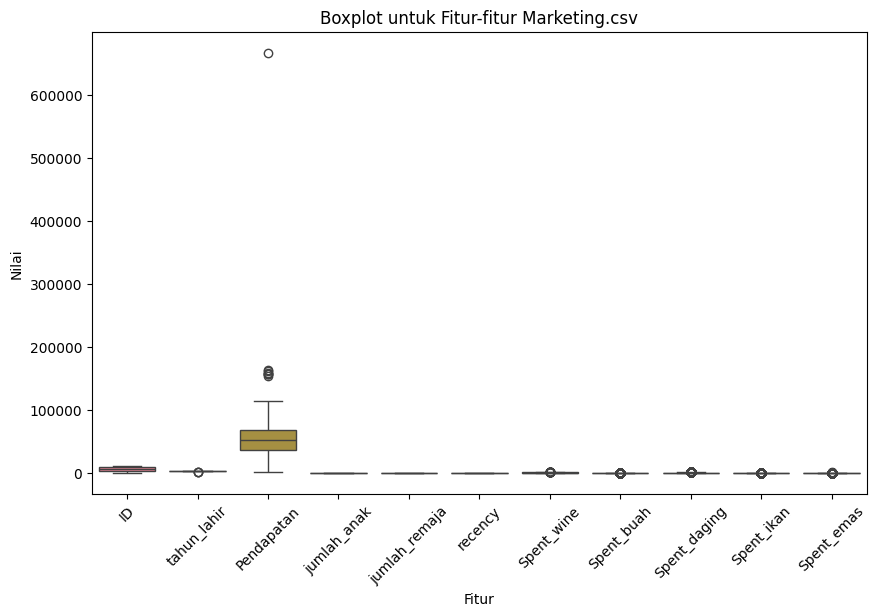

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, :])
plt.title("Boxplot untuk Fitur-fitur Marketing.csv")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.show()

kolom tahun_lahir, pendapatan, spent (wine, buah, daging, ikan, emas) ada outliers nya

### EDA data['Pendapatan']

terdapat 24 missing value

In [10]:
data['Pendapatan'].describe()

,Pendapatan
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


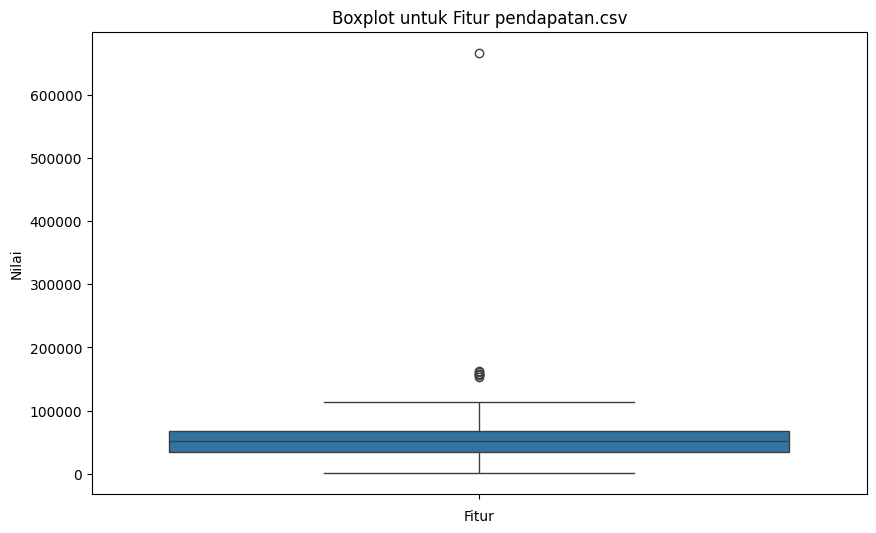

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Pendapatan'])
plt.title("Boxplot untuk Fitur pendapatan.csv")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.show()

In [12]:
outlier_pendapatan = detect_outliers_zscore(data['Pendapatan'])
print("hasil outliers : ", len(outlier_pendapatan), ": ", outlier_pendapatan)

Mean :  52247.25135379061
Std :  25167.396174162965
hasil outliers :  8 :  [157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]


### EDA data['tahun_lahir']

In [13]:
data['tahun_lahir'].describe()

,tahun_lahir
count,2240.000000
mean,1968.805804
std,11.984069
min,1893.000000
25%,1959.000000
50%,1970.000000
75%,1977.000000
max,1996.000000


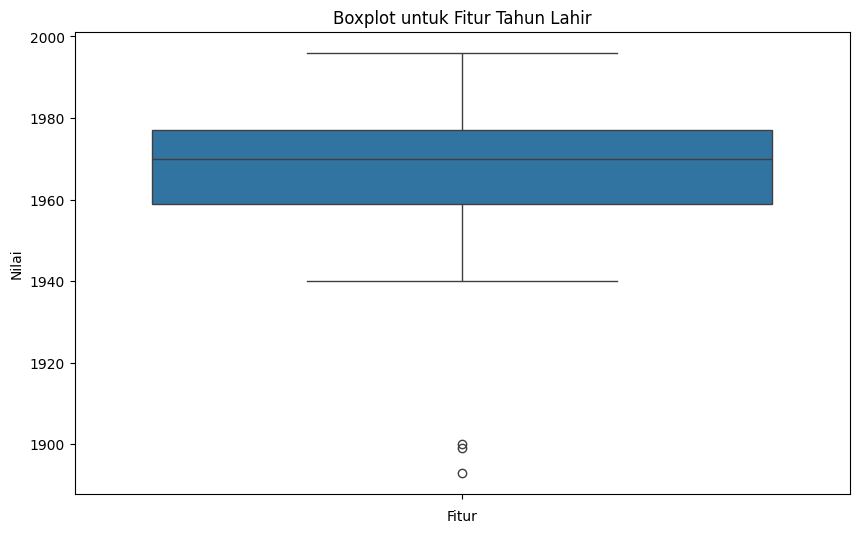

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['tahun_lahir'])
plt.title("Boxplot untuk Fitur Tahun Lahir")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.show()

In [15]:
outlier_tahun_lahir = detect_outliers_zscore(data['tahun_lahir'])
print("hasil outliers ", len(outlier_tahun_lahir), ": ", outlier_tahun_lahir)

Mean :  1968.8058035714287
Std :  11.981394142764563
hasil outliers  3 :  [1900, 1893, 1899]


### EDA data['Spent_Wine']

In [16]:
data['Spent_wine'].describe()

,Spent_wine
count,2240.000000
mean,303.935714
std,336.597393
min,0.000000
25%,23.750000
50%,173.500000
75%,504.250000
max,1493.000000


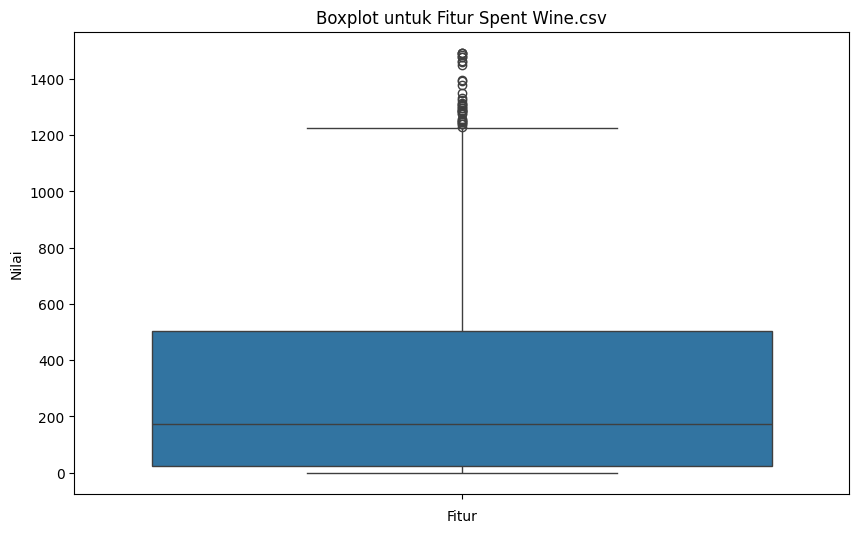

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Spent_wine'])
plt.title("Boxplot untuk Fitur Spent Wine.csv")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.show()

In [18]:
outlier_Spent_Wine = detect_outliers_zscore(data['Spent_wine'])
print("hasil outliers ", len(outlier_Spent_Wine), ": ", outlier_Spent_Wine)

Mean :  303.9357142857143
Std :  336.52225087151766
hasil outliers  16 :  [1332, 1349, 1396, 1379, 1478, 1492, 1492, 1478, 1394, 1315, 1449, 1459, 1493, 1324, 1462, 1486]


### EDA data['Spent_buah']

In [19]:
data['Spent_buah'].describe()

,Spent_buah
count,2240.000000
mean,26.302232
std,39.773434
min,0.000000
25%,1.000000
50%,8.000000
75%,33.000000
max,199.000000


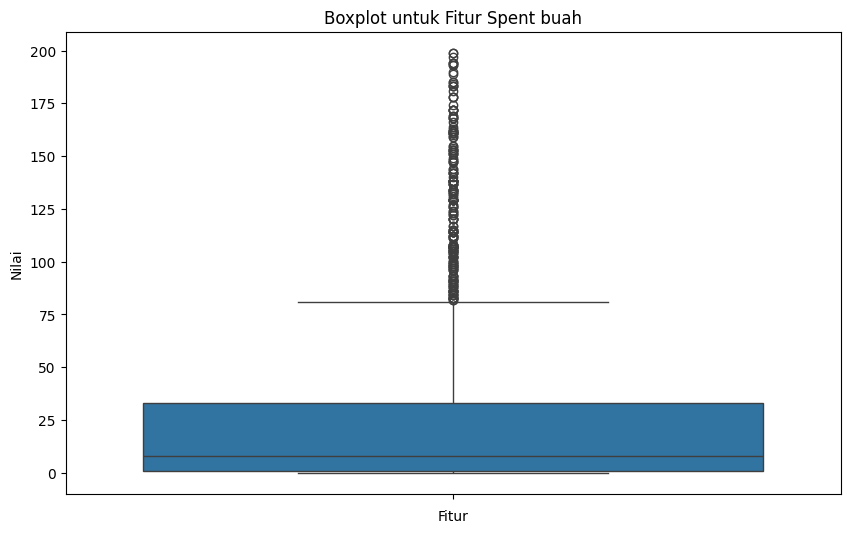

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Spent_buah'])
plt.title("Boxplot untuk Fitur Spent buah")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.show()

In [21]:
outlier_Spent_buah = detect_outliers_zscore(data['Spent_buah'])
print("hasil outliers ", len(outlier_Spent_buah), ": ", outlier_Spent_buah)

Mean :  26.302232142857143
Std :  39.76455477490109
hasil outliers  64 :  [164, 172, 194, 162, 189, 153, 148, 162, 183, 147, 153, 163, 152, 190, 162, 155, 151, 153, 183, 181, 159, 166, 178, 168, 148, 174, 199, 152, 168, 172, 178, 161, 161, 185, 147, 162, 161, 172, 168, 151, 199, 172, 161, 197, 194, 184, 160, 185, 147, 169, 169, 172, 153, 183, 193, 193, 149, 151, 154, 161, 159, 178, 155, 194]


### EDA data['Spent_daging']

In [22]:
data['Spent_daging'].describe()

,Spent_daging
count,2240.000000
mean,166.950000
std,225.715373
min,0.000000
25%,16.000000
50%,67.000000
75%,232.000000
max,1725.000000


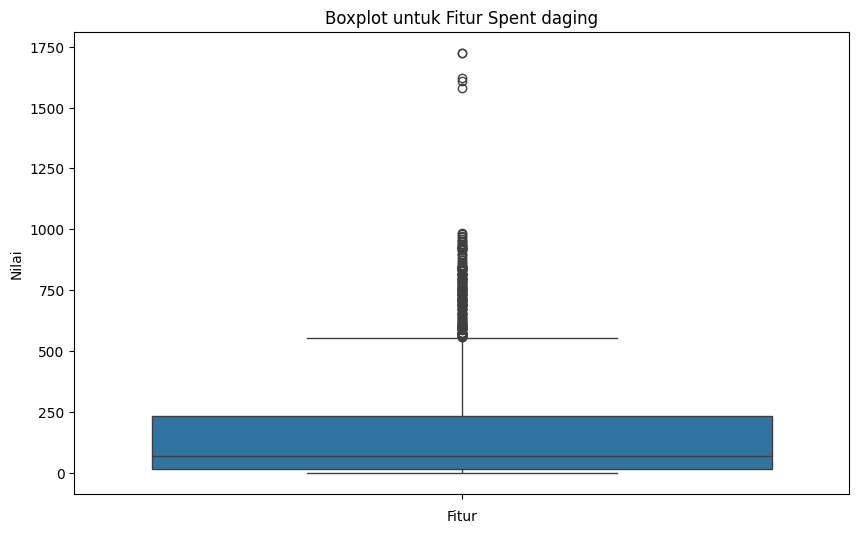

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Spent_daging'])
plt.title("Boxplot untuk Fitur Spent daging")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.show()

In [24]:
outlier_Spent_daging = detect_outliers_zscore(data['Spent_daging'])
print("hasil outliers ", len(outlier_Spent_daging), ": ", outlier_Spent_daging)

Mean :  166.95
Std :  225.6649839917571
hasil outliers  37 :  [1725, 925, 951, 921, 1582, 974, 925, 940, 1622, 898, 929, 845, 873, 890, 925, 961, 864, 915, 913, 946, 984, 915, 1725, 850, 936, 935, 853, 981, 899, 951, 932, 968, 883, 849, 845, 860, 1607]


### EDA Data['Spent_ikan']

In [25]:
data['Spent_ikan'].describe()

,Spent_ikan
count,2240.000000
mean,37.525446
std,54.628979
min,0.000000
25%,3.000000
50%,12.000000
75%,50.000000
max,259.000000


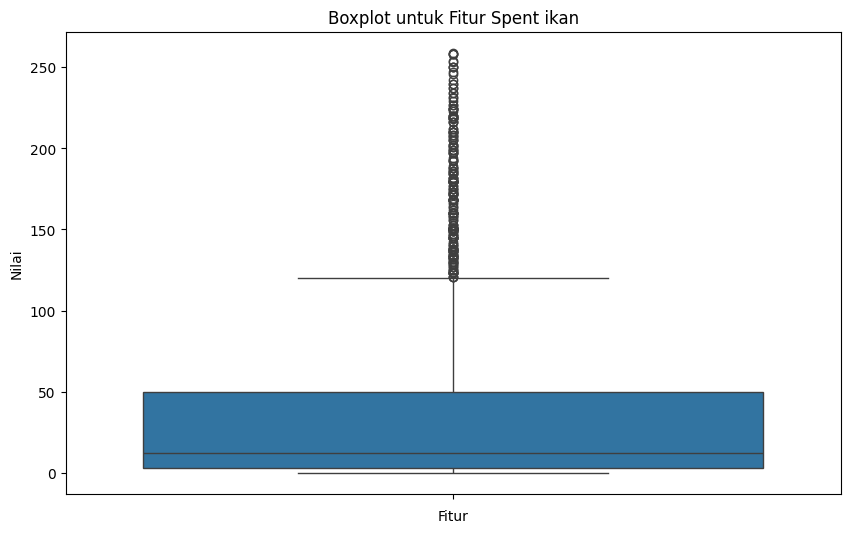

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Spent_ikan'])
plt.title("Boxplot untuk Fitur Spent ikan")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.show()

In [27]:
outlier_Spent_ikan = detect_outliers_zscore(data['Spent_ikan'])
print("hasil outliers ", len(outlier_Spent_ikan), ": ", outlier_Spent_ikan)

Mean :  37.52544642857143
Std :  54.616784073023496
hasil outliers  58 :  [225, 227, 224, 254, 218, 220, 205, 216, 219, 212, 220, 205, 240, 224, 231, 202, 247, 227, 202, 234, 210, 250, 220, 237, 250, 232, 240, 219, 237, 216, 259, 219, 207, 210, 242, 246, 210, 234, 210, 219, 253, 220, 258, 258, 207, 223, 258, 224, 216, 205, 208, 208, 210, 212, 250, 229, 224, 202]


### EDA data['Spent_emas']

In [28]:
data['Spent_emas'].describe()

,Spent_emas
count,2240.000000
mean,44.021875
std,52.167439
min,0.000000
25%,9.000000
50%,24.000000
75%,56.000000
max,362.000000


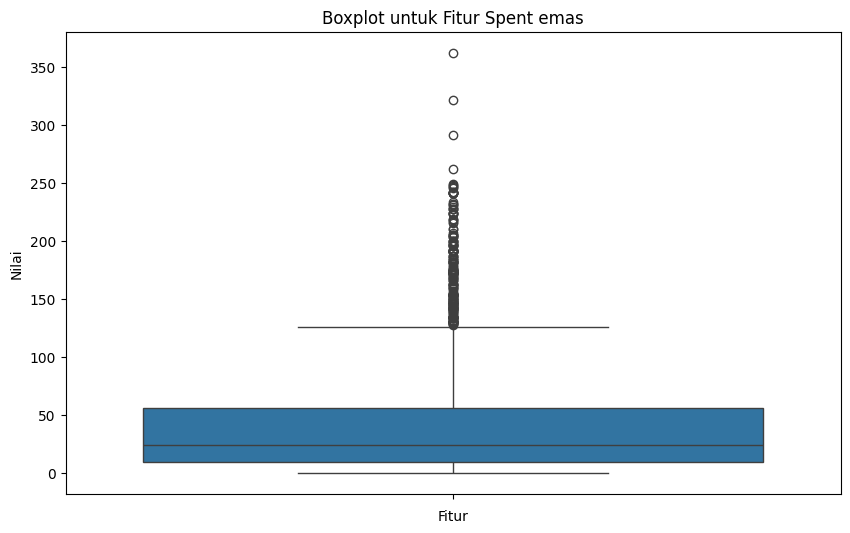

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Spent_emas'])
plt.title("Boxplot untuk Fitur Spent emas")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.show()

In [30]:
outlier_Spent_emas = detect_outliers_zscore(data['Spent_emas'])
print("hasil outliers ", len(outlier_Spent_emas), ": ", outlier_Spent_emas)

Mean :  44.021875
Std :  52.15579309748087
hasil outliers  44 :  [362, 241, 223, 216, 223, 241, 203, 224, 218, 233, 241, 224, 207, 242, 249, 227, 205, 205, 242, 241, 227, 231, 218, 210, 241, 210, 205, 262, 246, 215, 291, 232, 219, 203, 224, 321, 204, 232, 245, 229, 241, 248, 227, 247]


#***DATA PRE-PROCESSING***

###Menangani Missing Value Pendapatan :
(karena yang missing value bagian pendapatan dan ada 24, saya isi dengan nilai rata rata saja)

In [31]:
data['Pendapatan'] = data['Pendapatan'].fillna(data['Pendapatan'].mean())

Cek apakah masih ada missing value

In [32]:
data.isnull().sum()

,0
ID,0
tahun_lahir,0
Pendidikan,0
Status_pernikahan,0
Pendapatan,0
jumlah_anak,0
jumlah_remaja,0
tanggal_pendaftaran,0
recency,0
Spent_wine,0


### Pada Penanganan Outliers tidak semua variable yang outliers di tangani. yang di tangani adalah yang jumlah outliers nya sedikit dan apabila di tangani tidak merusak rentang nilai yang sebenarnya

###Menangani Outliers Pendapatan

ditangani karena gap outliers nya sangat jauh, merusak visualisasi, dan outliersnya hanya 8

In [33]:
median_value = np.median(data['Pendapatan'])
data['Pendapatan'] = np.where(data['Pendapatan'].isin(outlier_pendapatan), median_value, data['Pendapatan'])

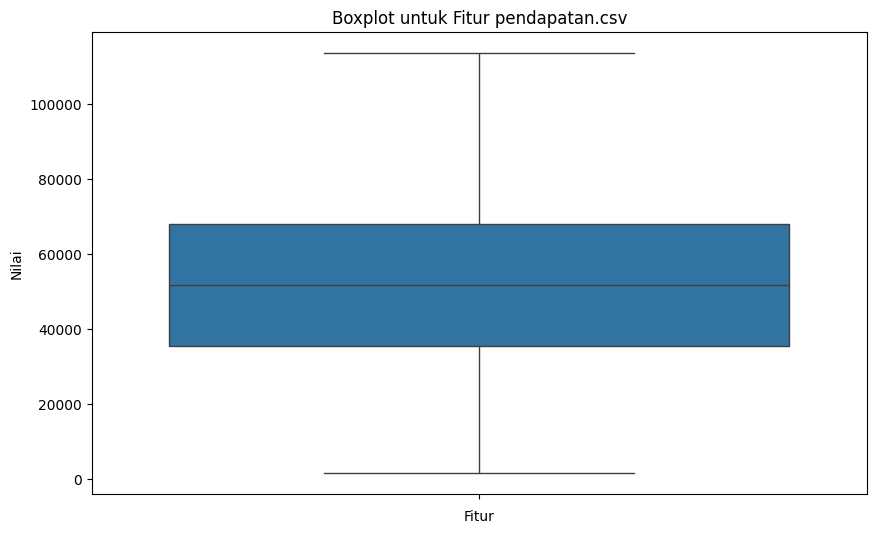

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Pendapatan'])
plt.title("Boxplot untuk Fitur pendapatan.csv")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.show()

###Menangani Outliers Tahun Lahir

ditangai outliernya karena hanya 3 data yang outlier dan sepertinya tidak masuk akal ada yang kelahiran 1893,1899, dan 1900 masih hidup di tahun 2012 - 2014 dan dia spent produk wine, daging, emas

In [35]:
median_value = np.median(data['tahun_lahir'])
data['tahun_lahir'] = np.where(data['tahun_lahir'].isin(outlier_tahun_lahir), median_value, data['tahun_lahir'])

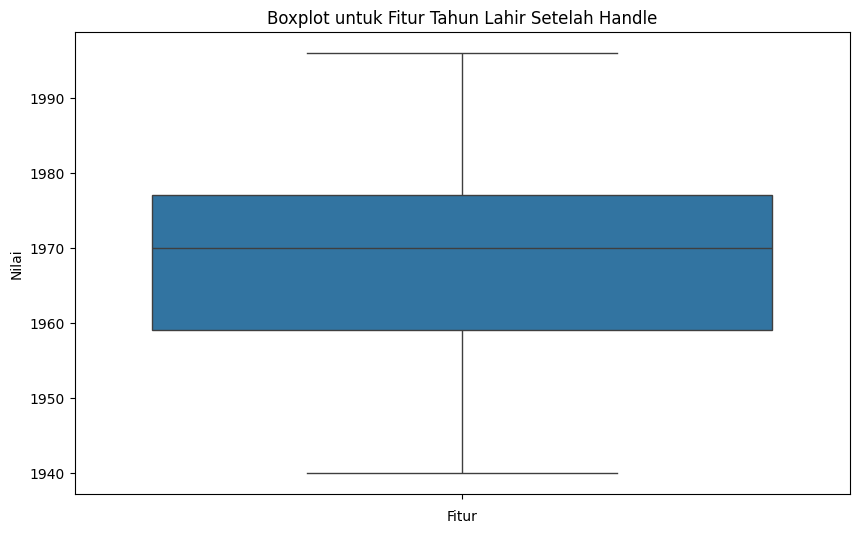

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['tahun_lahir'])
plt.title("Boxplot untuk Fitur Tahun Lahir Setelah Handle")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.show()

### Mengubah kolom dengan value kategorikal mejadi numerik agar Model ML dapat memproses inputan data

###Mengubah kolom 'Pendidikan' & 'Status_Pernikahan' menggunakan labelEncoder

In [37]:
# save data sebelumnya
pendidikan_real = data['Pendidikan']
status_pernikahan_real = data['Status_pernikahan']

In [38]:
label_encoder = LabelEncoder()
data['Pendidikan'] = label_encoder.fit_transform(data['Pendidikan'])
data['Status_pernikahan'] = label_encoder.fit_transform(data['Status_pernikahan'])
data.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas
0,5524,1957.0,2,4,58138.0,0,0,2012-09-04,58,635,88,546,172,88
1,2174,1954.0,2,4,46344.0,1,1,2014-03-08,38,11,1,6,2,6
2,4141,1965.0,2,5,71613.0,0,0,2013-08-21,26,426,49,127,111,42
3,6182,1984.0,2,5,26646.0,1,0,2014-02-10,26,11,4,20,10,5
4,5324,1981.0,4,3,58293.0,1,0,2014-01-19,94,173,43,118,46,15


***Membuat kolom umur berdasarkan sekarang - tahun lahir***

In [39]:
data['tanggal_pendaftaran'].sort_values()

,tanggal_pendaftaran
1255,2012-07-30
1363,2012-07-31
2029,2012-08-01
724,2012-08-01
976,2012-08-01
...,...
1812,2014-06-28
45,2014-06-28
796,2014-06-28
200,2014-06-29


In [40]:
today = datetime.now()
data['umur_pelanggan'] = (today.year - data['tahun_lahir'])
# data['jumlah_anak_total'] = data['jumlah_anak'] + data['jumlah_remaja']
data.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,umur_pelanggan
0,5524,1957.0,2,4,58138.0,0,0,2012-09-04,58,635,88,546,172,88,67.0
1,2174,1954.0,2,4,46344.0,1,1,2014-03-08,38,11,1,6,2,6,70.0
2,4141,1965.0,2,5,71613.0,0,0,2013-08-21,26,426,49,127,111,42,59.0
3,6182,1984.0,2,5,26646.0,1,0,2014-02-10,26,11,4,20,10,5,40.0
4,5324,1981.0,4,3,58293.0,1,0,2014-01-19,94,173,43,118,46,15,43.0


In [41]:
data.head(10)

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,umur_pelanggan
0,5524,1957.0,2,4,58138.0,0,0,2012-09-04,58,635,88,546,172,88,67.0
1,2174,1954.0,2,4,46344.0,1,1,2014-03-08,38,11,1,6,2,6,70.0
2,4141,1965.0,2,5,71613.0,0,0,2013-08-21,26,426,49,127,111,42,59.0
3,6182,1984.0,2,5,26646.0,1,0,2014-02-10,26,11,4,20,10,5,40.0
4,5324,1981.0,4,3,58293.0,1,0,2014-01-19,94,173,43,118,46,15,43.0
5,7446,1967.0,3,5,62513.0,0,1,2013-09-09,16,520,42,98,0,14,57.0
6,965,1971.0,2,2,55635.0,0,1,2012-11-13,34,235,65,164,50,27,53.0
7,6177,1985.0,4,3,33454.0,1,0,2013-05-08,32,76,10,56,3,23,39.0
8,4855,1974.0,4,5,30351.0,1,0,2013-06-06,19,14,0,24,3,2,50.0
9,5899,1950.0,4,5,5648.0,1,1,2014-03-13,68,28,0,6,1,13,74.0


#***FEATURE ENGINEERING***

###Melihat Korelasi antar Variable dengan Heatmap

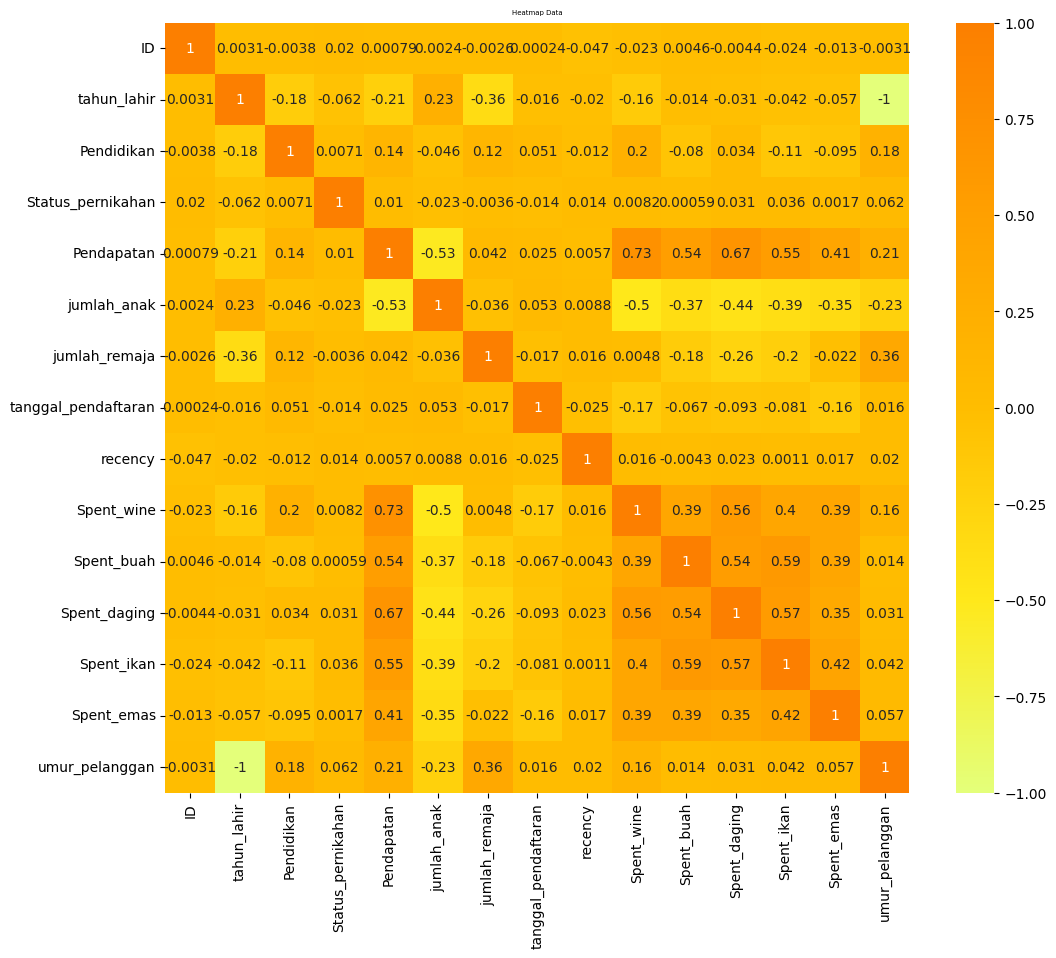

In [42]:
# Features Selection
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 5)
plt.show()

In [43]:
korelasi = data.corr()
sorted_corr = korelasi.unstack().sort_values(ascending=False)
sorted_corr = sorted_corr[sorted_corr != 1]
sorted_corr = sorted_corr.drop_duplicates()
print(sorted_corr)
# korelasi = df.corr()["Loan_Status"].sort_values()
# korelasi

Spent_wine    Pendapatan        0.727109
Pendapatan    Spent_daging      0.673371
Spent_buah    Spent_ikan        0.594804
Spent_ikan    Spent_daging      0.568402
Spent_wine    Spent_daging      0.562667
                                  ...   
Spent_ikan    jumlah_anak      -0.387644
Spent_daging  jumlah_anak      -0.437129
jumlah_anak   Spent_wine       -0.496297
              Pendapatan       -0.526847
tahun_lahir   umur_pelanggan   -1.000000
Length: 105, dtype: float64


### DROP Kolom yang berkorelasi kecil

***Drop fitur yang tidak terlalu berpengaruh, di bawah 40% atau 0.4*** : ID, tahun_lahir, pendidikan, status_pernikahan, jumlah_anak, jumlah_remaja, tanggal_pendaftaran, recency, umur_pelanggan

In [44]:
cluster_data = data.drop(["ID","tahun_lahir", "Pendidikan","Status_pernikahan", "jumlah_anak","jumlah_remaja","tanggal_pendaftaran","recency","umur_pelanggan"], axis = 1)
cluster_data.head()

,Pendapatan,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas
0,58138.0,635,88,546,172,88
1,46344.0,11,1,6,2,6
2,71613.0,426,49,127,111,42
3,26646.0,11,4,20,10,5
4,58293.0,173,43,118,46,15


###Scaling Data dengan StandarScaler()

menyamakan gap range value antara pendapatan yang sampai puluhan ribu

In [45]:
scaler = StandardScaler()
cluster_data[["Pendapatan", "Spent_wine","Spent_buah","Spent_daging","Spent_ikan","Spent_emas"]] = scaler.fit_transform(cluster_data[["Pendapatan", "Spent_wine","Spent_buah","Spent_daging","Spent_ikan","Spent_emas"]])
cluster_data.head()

,Pendapatan,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas
0,0.316016,0.983781,1.551577,1.679702,2.462147,0.843207
1,-0.257612,-0.870479,-0.636301,-0.713225,-0.650449,-0.729006
2,0.971405,0.362723,0.570804,-0.177032,1.345274,-0.038766
3,-1.215671,-0.870479,-0.560857,-0.651187,-0.503974,-0.748179
4,0.323555,-0.389085,0.419916,-0.216914,0.155164,-0.556446


# ***MODELING***

In [46]:
# Memodelkan data dengan cluster yang sudah ditentukan yaitu 2
cluster = KMeans(n_clusters=3) # low, medium, high
cluster.fit(cluster_data)

KMeans(n_clusters=3)

In [47]:
segment = pd.Series(cluster.labels_, name="segment")
data_segment = pd.concat([data, segment], axis=1)
data_segment.head(10)
# segment = pd.Series(cluster.labels_, name="segment")
# data_segment = pd.concat([cluster_data, segment], axis=1)
# data_segment.head(10)

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,umur_pelanggan,segment
0,5524,1957.0,2,4,58138.0,0,0,2012-09-04,58,635,88,546,172,88,67.0,1
1,2174,1954.0,2,4,46344.0,1,1,2014-03-08,38,11,1,6,2,6,70.0,0
2,4141,1965.0,2,5,71613.0,0,0,2013-08-21,26,426,49,127,111,42,59.0,2
3,6182,1984.0,2,5,26646.0,1,0,2014-02-10,26,11,4,20,10,5,40.0,0
4,5324,1981.0,4,3,58293.0,1,0,2014-01-19,94,173,43,118,46,15,43.0,2
5,7446,1967.0,3,5,62513.0,0,1,2013-09-09,16,520,42,98,0,14,57.0,2
6,965,1971.0,2,2,55635.0,0,1,2012-11-13,34,235,65,164,50,27,53.0,2
7,6177,1985.0,4,3,33454.0,1,0,2013-05-08,32,76,10,56,3,23,39.0,0
8,4855,1974.0,4,5,30351.0,1,0,2013-06-06,19,14,0,24,3,2,50.0,0
9,5899,1950.0,4,5,5648.0,1,1,2014-03-13,68,28,0,6,1,13,74.0,0


# ***EVALUATION***

###Evaluasi Dengan Elbow Score

In [48]:
Sum_of_squared_error = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

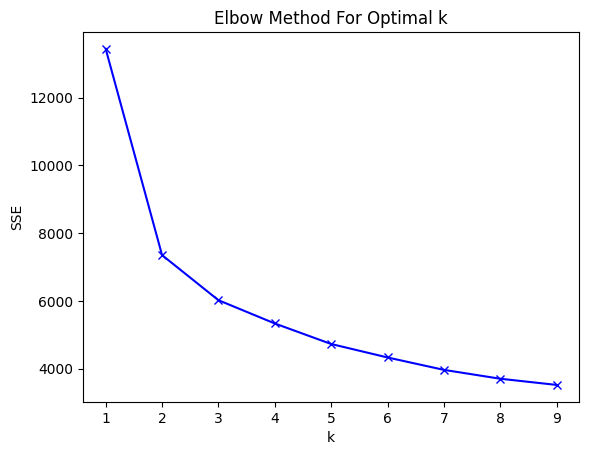

In [49]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

###Evaluasi Dengan Silohoute Score

In [50]:
range_n_clusters = range(2, 10)
best_score = -1
best_k = -1

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    score = silhouette_score(cluster_data, preds)

    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    if score > best_score:
        best_score = score
        best_k = n_clusters

print("Best silhouette score is {} for n_clusters = {}".format(best_score, best_k))

For n_clusters = 2, silhouette score is 0.4739538075897303
For n_clusters = 3, silhouette score is 0.39303383840287986
For n_clusters = 4, silhouette score is 0.4045476321941204
For n_clusters = 5, silhouette score is 0.36889628810481323
For n_clusters = 6, silhouette score is 0.3647529301994717
For n_clusters = 7, silhouette score is 0.3241511445608192
For n_clusters = 8, silhouette score is 0.30471991633918927
For n_clusters = 9, silhouette score is 0.27248700029050854
Best silhouette score is 0.4739538075897303 for n_clusters = 2


Ternyata dari Elbow dan Silohout Score memberikan rekomendasi cluster terbaik adalah 2

#**Modelling Ulang KMeans dengan 2 Cluster**

In [51]:
# Memodelkan data dengan k-means
cluster = KMeans(n_clusters=2, random_state = 42)
cluster.fit(cluster_data)

KMeans(n_clusters=2, random_state=42)

In [52]:
segment = pd.Series(cluster.labels_, name="segment")
data_segment = pd.concat([data, segment], axis=1)
data_segment.head(10)

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,umur_pelanggan,segment
0,5524,1957.0,2,4,58138.0,0,0,2012-09-04,58,635,88,546,172,88,67.0,1
1,2174,1954.0,2,4,46344.0,1,1,2014-03-08,38,11,1,6,2,6,70.0,0
2,4141,1965.0,2,5,71613.0,0,0,2013-08-21,26,426,49,127,111,42,59.0,1
3,6182,1984.0,2,5,26646.0,1,0,2014-02-10,26,11,4,20,10,5,40.0,0
4,5324,1981.0,4,3,58293.0,1,0,2014-01-19,94,173,43,118,46,15,43.0,0
5,7446,1967.0,3,5,62513.0,0,1,2013-09-09,16,520,42,98,0,14,57.0,0
6,965,1971.0,2,2,55635.0,0,1,2012-11-13,34,235,65,164,50,27,53.0,0
7,6177,1985.0,4,3,33454.0,1,0,2013-05-08,32,76,10,56,3,23,39.0,0
8,4855,1974.0,4,5,30351.0,1,0,2013-06-06,19,14,0,24,3,2,50.0,0
9,5899,1950.0,4,5,5648.0,1,1,2014-03-13,68,28,0,6,1,13,74.0,0


# ***EDA Setelah Clustering***

In [53]:
cluster_jumlah = data_segment['segment'].value_counts()
print(cluster_jumlah)

segment
0    1422
1     818
Name: count, dtype: int64


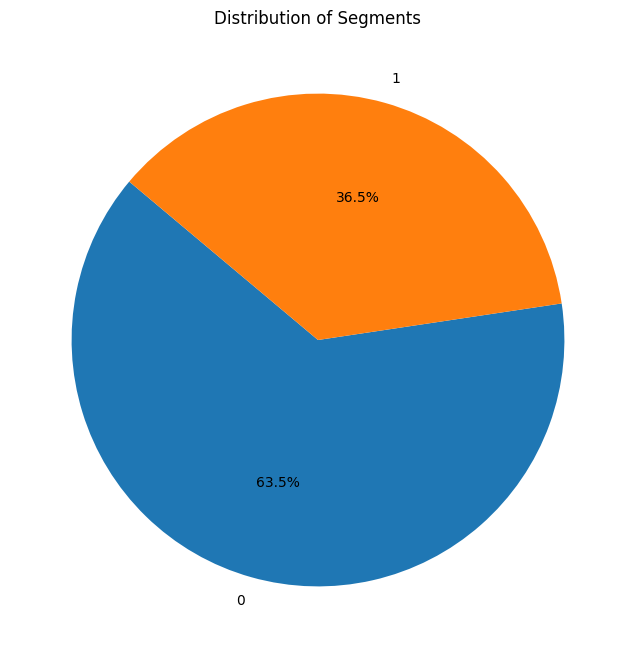

In [54]:
plt.figure(figsize=(8, 8))
plt.pie(cluster_jumlah, labels=cluster_jumlah.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Segments')
plt.show()

In [55]:
data_segment.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,umur_pelanggan,segment
0,5524,1957.0,2,4,58138.0,0,0,2012-09-04,58,635,88,546,172,88,67.0,1
1,2174,1954.0,2,4,46344.0,1,1,2014-03-08,38,11,1,6,2,6,70.0,0
2,4141,1965.0,2,5,71613.0,0,0,2013-08-21,26,426,49,127,111,42,59.0,1
3,6182,1984.0,2,5,26646.0,1,0,2014-02-10,26,11,4,20,10,5,40.0,0
4,5324,1981.0,4,3,58293.0,1,0,2014-01-19,94,173,43,118,46,15,43.0,0


### Menampilkan Data Berdasarkan Segment

In [56]:
data_segment[data_segment['segment'] == 1].head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,umur_pelanggan,segment
0,5524,1957.0,2,4,58138.0,0,0,2012-09-04,58,635,88,546,172,88,67.0,1
2,4141,1965.0,2,5,71613.0,0,0,2013-08-21,26,426,49,127,111,42,59.0,1
12,2125,1959.0,2,2,63033.0,0,0,2013-11-15,82,194,61,480,225,30,65.0,1
15,2114,1946.0,4,4,82800.0,0,0,2012-11-24,23,1006,22,115,59,45,78.0,1
18,6565,1949.0,3,3,76995.0,0,1,2013-03-28,91,1012,80,498,0,176,75.0,1


In [57]:
data_segment[data_segment['segment'] == 0].head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,umur_pelanggan,segment
1,2174,1954.0,2,4,46344.0,1,1,2014-03-08,38,11,1,6,2,6,70.0,0
3,6182,1984.0,2,5,26646.0,1,0,2014-02-10,26,11,4,20,10,5,40.0,0
4,5324,1981.0,4,3,58293.0,1,0,2014-01-19,94,173,43,118,46,15,43.0,0
5,7446,1967.0,3,5,62513.0,0,1,2013-09-09,16,520,42,98,0,14,57.0,0
6,965,1971.0,2,2,55635.0,0,1,2012-11-13,34,235,65,164,50,27,53.0,0


***Segment by Pendidikan***

In [58]:
data_segment['pendidikan_real'] = pendidikan_real
data_segment.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,umur_pelanggan,segment,pendidikan_real
0,5524,1957.0,2,4,58138.0,0,0,2012-09-04,58,635,88,546,172,88,67.0,1,Graduation
1,2174,1954.0,2,4,46344.0,1,1,2014-03-08,38,11,1,6,2,6,70.0,0,Graduation
2,4141,1965.0,2,5,71613.0,0,0,2013-08-21,26,426,49,127,111,42,59.0,1,Graduation
3,6182,1984.0,2,5,26646.0,1,0,2014-02-10,26,11,4,20,10,5,40.0,0,Graduation
4,5324,1981.0,4,3,58293.0,1,0,2014-01-19,94,173,43,118,46,15,43.0,0,PhD


In [59]:
data_segment['status_pernikahan_real'] = status_pernikahan_real
data_segment.head(10)

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,umur_pelanggan,segment,pendidikan_real,status_pernikahan_real
0,5524,1957.0,2,4,58138.0,0,0,2012-09-04,58,635,88,546,172,88,67.0,1,Graduation,Single
1,2174,1954.0,2,4,46344.0,1,1,2014-03-08,38,11,1,6,2,6,70.0,0,Graduation,Single
2,4141,1965.0,2,5,71613.0,0,0,2013-08-21,26,426,49,127,111,42,59.0,1,Graduation,Together
3,6182,1984.0,2,5,26646.0,1,0,2014-02-10,26,11,4,20,10,5,40.0,0,Graduation,Together
4,5324,1981.0,4,3,58293.0,1,0,2014-01-19,94,173,43,118,46,15,43.0,0,PhD,Married
5,7446,1967.0,3,5,62513.0,0,1,2013-09-09,16,520,42,98,0,14,57.0,0,Master,Together
6,965,1971.0,2,2,55635.0,0,1,2012-11-13,34,235,65,164,50,27,53.0,0,Graduation,Divorced
7,6177,1985.0,4,3,33454.0,1,0,2013-05-08,32,76,10,56,3,23,39.0,0,PhD,Married
8,4855,1974.0,4,5,30351.0,1,0,2013-06-06,19,14,0,24,3,2,50.0,0,PhD,Together
9,5899,1950.0,4,5,5648.0,1,1,2014-03-13,68,28,0,6,1,13,74.0,0,PhD,Together


###***ANALISIS SEGMENT BY UMUR PELANGGAN***

In [60]:
print ("Uumur max pelanggan : ",data_segment['umur_pelanggan'].max())
print ("Uumur main pelanggan : ",data_segment['umur_pelanggan'].min())

Uumur max pelanggan :  84.0
Uumur main pelanggan :  28.0


In [61]:
segment_0_data = data_segment[data_segment['segment'] == 0]
rata_rata_umur_segment_0 = segment_0_data['umur_pelanggan'].mean()
print("Nilai rata-rata umur_pelanggan dari yang bersegment 0:", rata_rata_umur_segment_0)

segment_1_data = data_segment[data_segment['segment'] == 1]
rata_rata_umur_segment_1 = segment_1_data['umur_pelanggan'].mean()
print("Nilai rata-rata umur_pelanggan dari yang bersegment 1:", rata_rata_umur_segment_1)

Nilai rata-rata umur_pelanggan dari yang bersegment 0: 54.33825597749648
Nilai rata-rata umur_pelanggan dari yang bersegment 1: 56.41564792176039


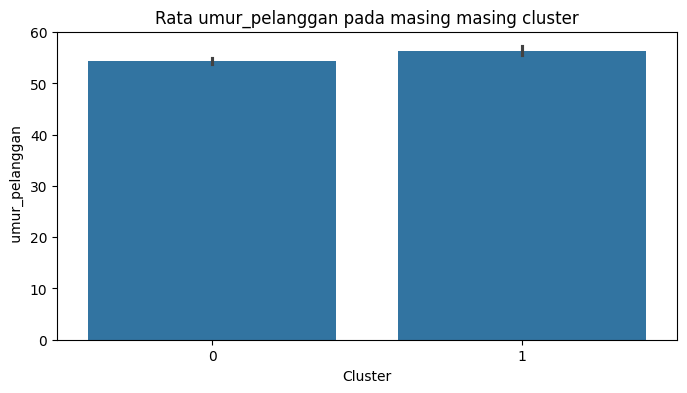

In [62]:
plt.figure(figsize=(8, 4))  # Mengatur ukuran bar plot menjadi (8, 4)
sns.barplot(x="segment", y="umur_pelanggan", data=data_segment)
plt.title("Rata umur_pelanggan pada masing masing cluster")
plt.xlabel("Cluster")
plt.ylabel(" umur_pelanggan")
plt.show()

terlihat umur tidak terlalu signifikan terhadap penggambaran cluster

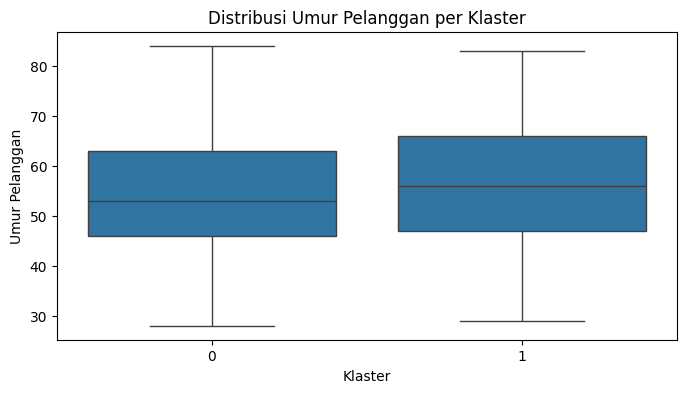

In [63]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="segment", y="umur_pelanggan", data=data_segment)
plt.title("Distribusi Umur Pelanggan per Klaster")
plt.xlabel("Klaster")
plt.ylabel("Umur Pelanggan")
plt.show()

###***ANALISIS SEGMENT BY PENDAPATAN***

In [64]:
print ("Pendapatan Max Pelanggan : ",data_segment['Pendapatan'].max())
print ("Pendapatan Min Pelanggan : ",data_segment['Pendapatan'].min())

Pendapatan Max Pelanggan :  113734.0
Pendapatan Min Pelanggan :  1730.0


In [65]:
segment_0_data = data_segment[data_segment['segment'] == 0]
mean_pendapatan_segment_0 = segment_0_data['Pendapatan'].mean()
print("Nilai rata-rata Pendapatan dari yang bersegment 0:", mean_pendapatan_segment_0)

segment_1_data = data_segment[data_segment['segment'] == 1]
mean_pendapatan_segment_1 = segment_1_data['Pendapatan'].mean()
print("Nilai rata-rata Pendapatan dari yang bersegment 1:", mean_pendapatan_segment_1)

Nilai rata-rata Pendapatan dari yang bersegment 0: 39841.35831340411
Nilai rata-rata Pendapatan dari yang bersegment 1: 72152.23412081947


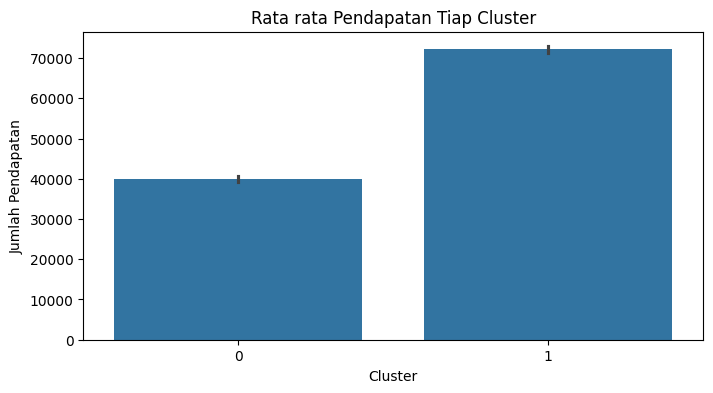

In [66]:
plt.figure(figsize=(8, 4))  # Mengatur ukuran bar plot menjadi (8, 4)
sns.barplot(x="segment", y="Pendapatan", data=data_segment)
plt.title("Rata rata Pendapatan Tiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Pendapatan")
plt.show()

terlihat sekali bahwa cluster 0 punya pendapatan yang jauh lebih tinggi dari cluster 1 sekitar 40%

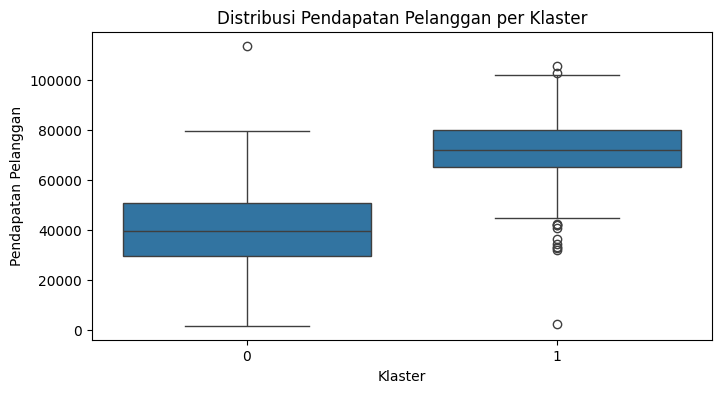

In [67]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="segment", y="Pendapatan", data=data_segment)
plt.title("Distribusi Pendapatan Pelanggan per Klaster")
plt.xlabel("Klaster")
plt.ylabel("Pendapatan Pelanggan")
plt.show()

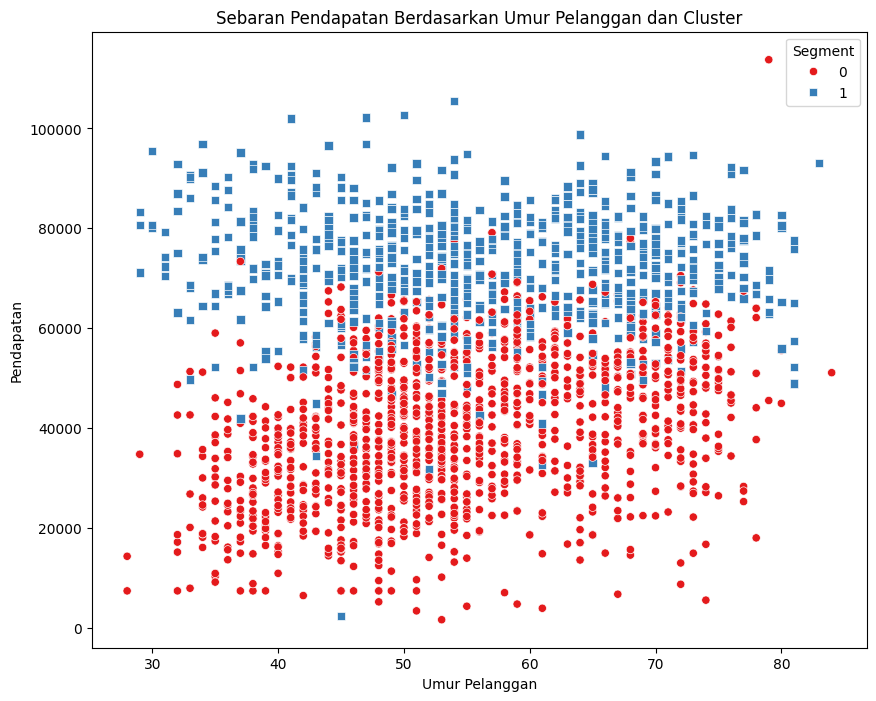

In [68]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='umur_pelanggan', y='Pendapatan', data=data_segment, hue='segment', style='segment', palette='Set1', markers=['o', 's'])
plt.title("Sebaran Pendapatan Berdasarkan Umur Pelanggan dan Cluster")
plt.xlabel("Umur Pelanggan")
plt.ylabel("Pendapatan")
plt.legend(title='Segment')
plt.show()


sebaranya juga cukup mereta dan jelas dimana cluster 0 (warna merah) pendapatanya di atas cluster 1

###***ANALISIS SEGMENT BY JUMLAH ANAK***

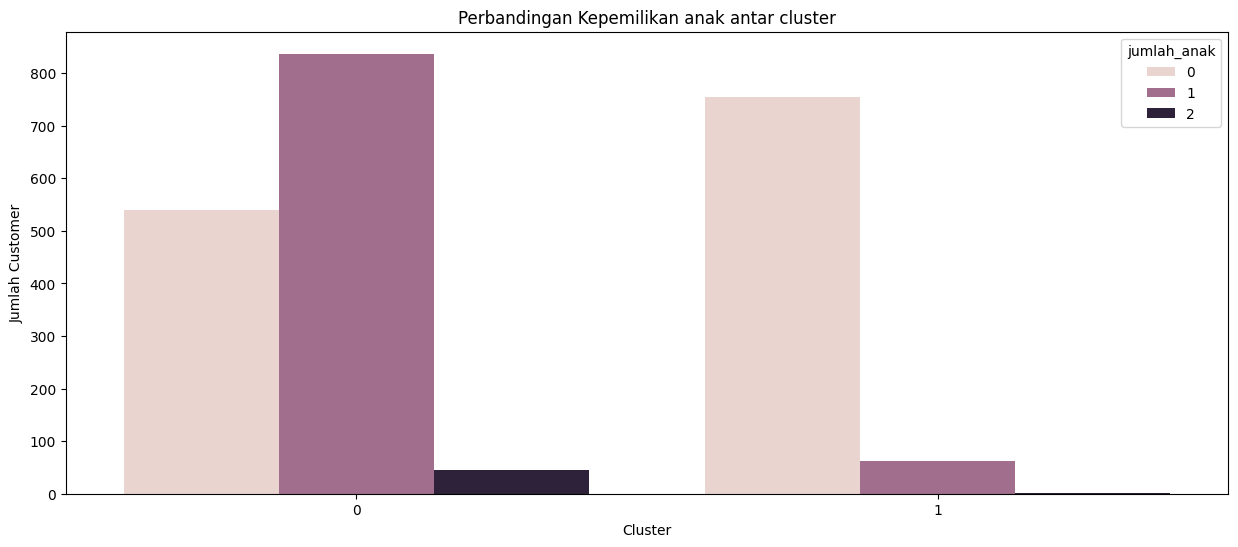

In [69]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=data_segment, hue="jumlah_anak")
plt.title("Perbandingan Kepemilikan anak antar cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

rata rata cluster 0 gapunya anak, kalau cluster 1 rata rata punya anak 1, dan yang punya anak 2 kebanyakan di cluster 1

###***ANALISIS SEGMENT BY JUMLAH REMAJA***

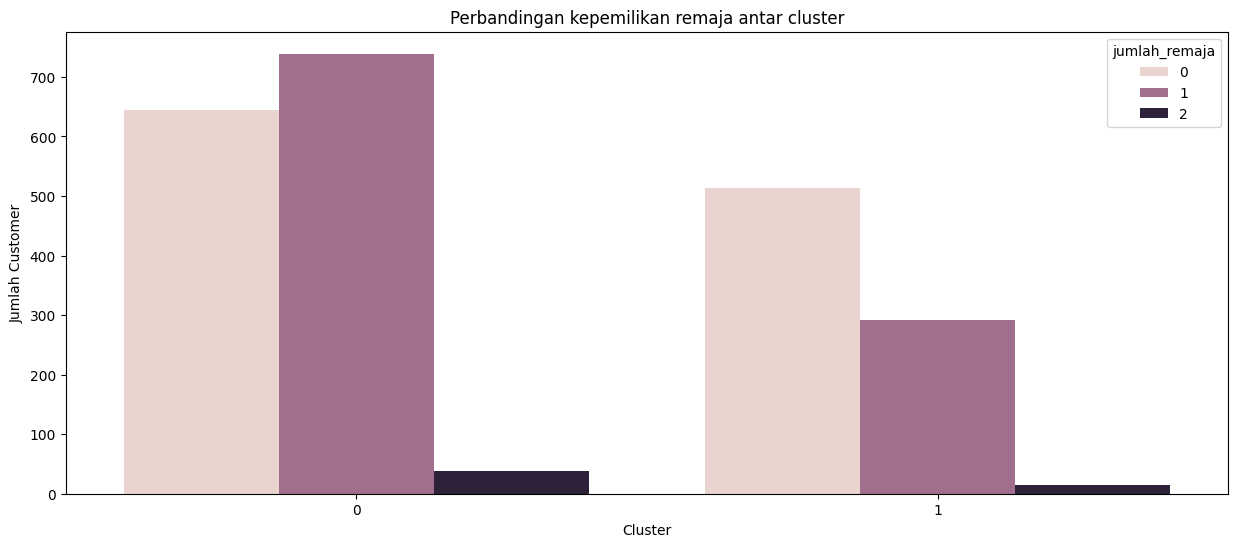

In [70]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=data_segment, hue="jumlah_remaja")
plt.title("Perbandingan kepemilikan remaja antar cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

cluster 0 rata rata gapunya remaja, sedangkan cluster 1 dominan memiliki 1 remaja, dan jumlah remaja 2 itu lebih banyak berada di cluster 1

###***ANALISIS SEGMENT BY PENDIDIKAN***

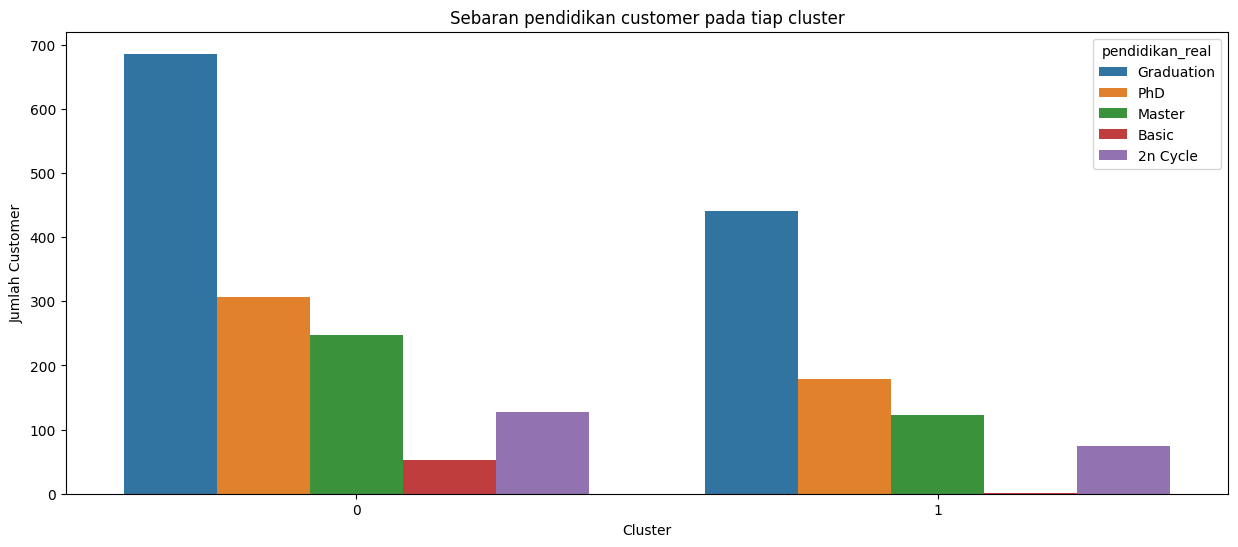

In [71]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=data_segment, hue="pendidikan_real")
plt.title("Sebaran pendidikan customer pada tiap cluster")
plt.xlabel("Cluster")

plt.ylabel("Jumlah Customer")
plt.show()

pendidikan tidak terlalu menggambarkan cluster

###***ANALISIS SEGMENT BY PERNIKAHAN***

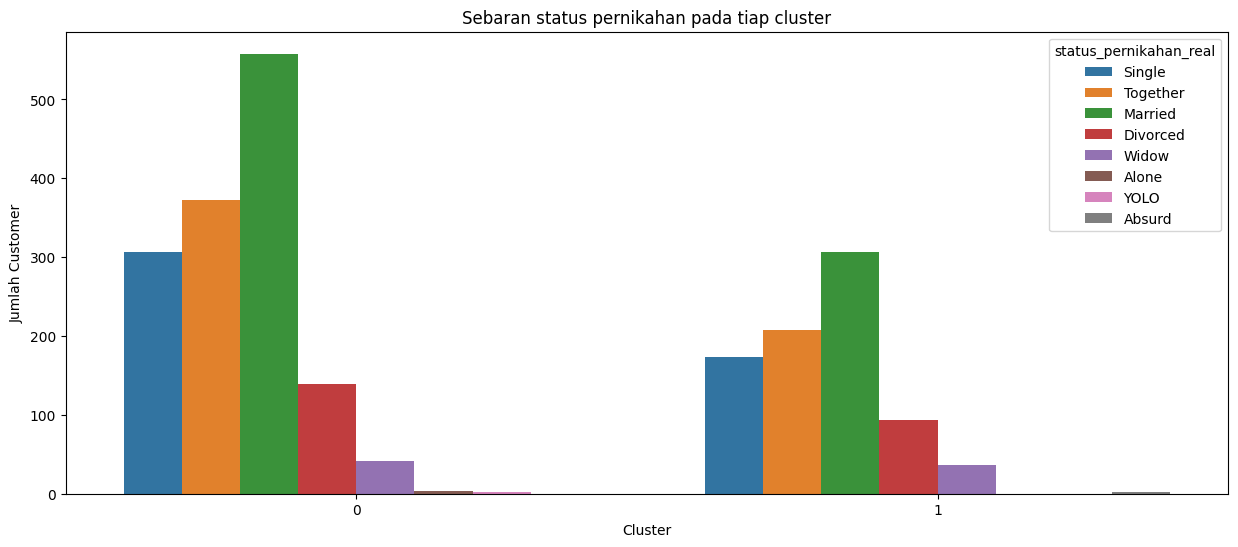

In [72]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=data_segment, hue="status_pernikahan_real")
plt.title("Sebaran status pernikahan pada tiap cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

pernikahan juga tidak terlalu menggambarkan cluster

###***ANALISIS SEGMENT BY PRODUK***

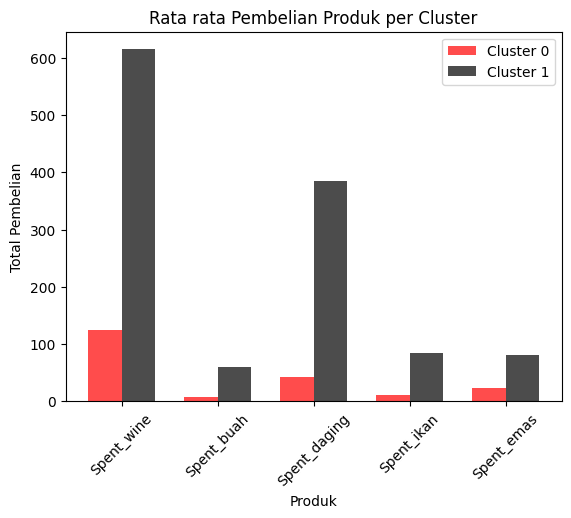

In [73]:
# Pisahkan data menjadi dua subset berdasarkan cluster
cluster_0_data = data_segment[data_segment['segment'] == 0]
cluster_1_data = data_segment[data_segment['segment'] == 1]

# Hitung jumlah pembelian produk pada masing-masing cluster
produk_cluster_0 = cluster_0_data[['Spent_wine', 'Spent_buah', 'Spent_daging', 'Spent_ikan', 'Spent_emas']].mean()
produk_cluster_1 = cluster_1_data[['Spent_wine', 'Spent_buah', 'Spent_daging', 'Spent_ikan', 'Spent_emas']].mean()

# Tentukan jumlah produk dan cluster
jumlah_produk = len(produk_cluster_0)
lebar_bar = 0.35

# Tentukan posisi untuk setiap bar
posisi_cluster_0 = np.arange(jumlah_produk)
posisi_cluster_1 = posisi_cluster_0 + lebar_bar

# Visualisasikan jumlah pembelian produk pada setiap cluster
plt.bar(posisi_cluster_0, produk_cluster_0, color='red', alpha=0.7, width=lebar_bar, label='Cluster 0')
plt.bar(posisi_cluster_1, produk_cluster_1, color='black', alpha=0.7, width=lebar_bar, label='Cluster 1')

plt.title('Rata rata Pembelian Produk per Cluster')
plt.xlabel('Produk')
plt.ylabel('Total Pembelian')
plt.xticks(posisi_cluster_0 + lebar_bar / 2, produk_cluster_0.index, rotation=45)
plt.legend()
plt.show()


terlihat bahwa cluster 0 memiliki spent produk berkali kali lipat lebih besar dari cluster 1

###***ANALISIS SEGMENT BY PENDAPATAN DAN SPENT PRODUK***

***SPENT WINE***

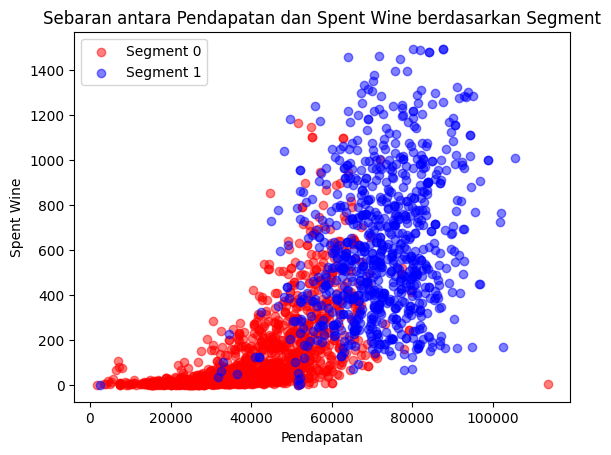

In [74]:
# Pisahkan data menjadi dua subset berdasarkan segment
cluster_0_data = data_segment[data_segment['segment'] == 0]
cluster_1_data = data_segment[data_segment['segment'] == 1]

# Plot scatter plot untuk klaster 0
plt.scatter(cluster_0_data['Pendapatan'], cluster_0_data['Spent_wine'], color='red', alpha=0.5, label='Segment 0')

# Plot scatter plot untuk klaster 1
plt.scatter(cluster_1_data['Pendapatan'], cluster_1_data['Spent_wine'], color='blue', alpha=0.5, label='Segment 1')

# Menambahkan label dan judul
plt.xlabel('Pendapatan')
plt.ylabel('Spent Wine')
plt.title('Sebaran antara Pendapatan dan Spent Wine berdasarkan Segment')
plt.legend()

# Tampilkan plot
plt.show()

***SPENT BUAH***

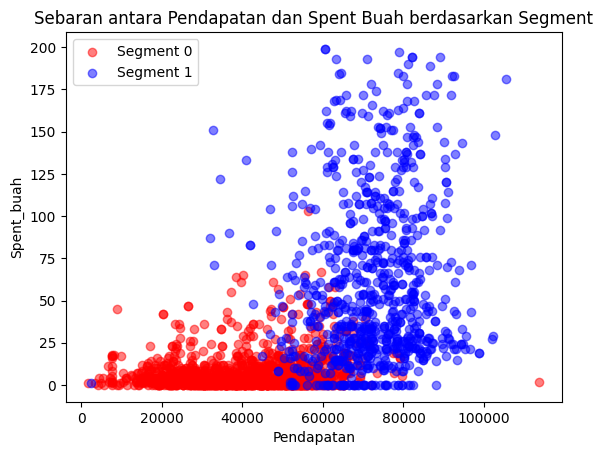

In [75]:
# Pisahkan data menjadi dua subset berdasarkan segment
cluster_0_data = data_segment[data_segment['segment'] == 0]
cluster_1_data = data_segment[data_segment['segment'] == 1]

# Plot scatter plot untuk klaster 0
plt.scatter(cluster_0_data['Pendapatan'], cluster_0_data['Spent_buah'], color='red', alpha=0.5, label='Segment 0')

# Plot scatter plot untuk klaster 1
plt.scatter(cluster_1_data['Pendapatan'], cluster_1_data['Spent_buah'], color='blue', alpha=0.5, label='Segment 1')

# Menambahkan label dan judul
plt.xlabel('Pendapatan')
plt.ylabel('Spent_buah')
plt.title('Sebaran antara Pendapatan dan Spent Buah berdasarkan Segment')
plt.legend()

# Tampilkan plot
plt.show()

***SPENT DAGING***

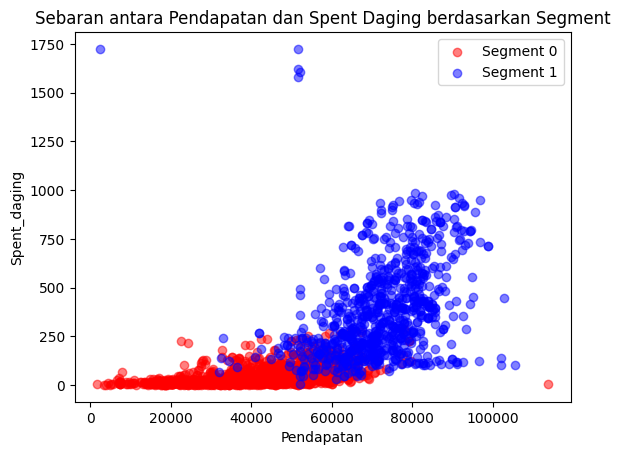

In [76]:
# Pisahkan data menjadi dua subset berdasarkan segment
cluster_0_data = data_segment[data_segment['segment'] == 0]
cluster_1_data = data_segment[data_segment['segment'] == 1]

# Plot scatter plot untuk klaster 0
plt.scatter(cluster_0_data['Pendapatan'], cluster_0_data['Spent_daging'], color='red', alpha=0.5, label='Segment 0')

# Plot scatter plot untuk klaster 1
plt.scatter(cluster_1_data['Pendapatan'], cluster_1_data['Spent_daging'], color='blue', alpha=0.5, label='Segment 1')

# Menambahkan label dan judul
plt.xlabel('Pendapatan')
plt.ylabel('Spent_daging')
plt.title('Sebaran antara Pendapatan dan Spent Daging berdasarkan Segment')
plt.legend()

# Tampilkan plot
plt.show()

***SPENT IKAN***

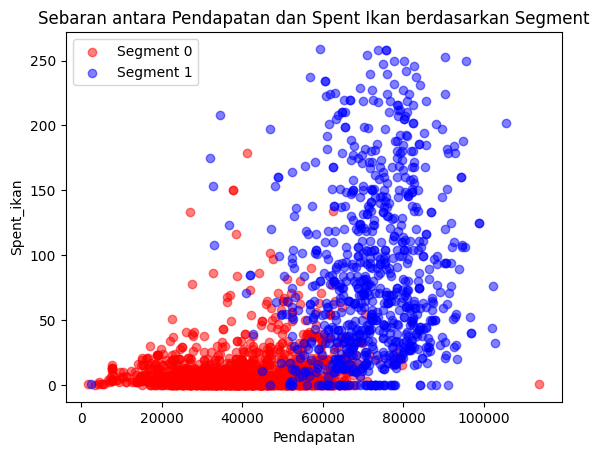

In [77]:
# Pisahkan data menjadi dua subset berdasarkan segment
cluster_0_data = data_segment[data_segment['segment'] == 0]
cluster_1_data = data_segment[data_segment['segment'] == 1]

# Plot scatter plot untuk klaster 0
plt.scatter(cluster_0_data['Pendapatan'], cluster_0_data['Spent_ikan'], color='red', alpha=0.5, label='Segment 0')

# Plot scatter plot untuk klaster 1
plt.scatter(cluster_1_data['Pendapatan'], cluster_1_data['Spent_ikan'], color='blue', alpha=0.5, label='Segment 1')

# Menambahkan label dan judul
plt.xlabel('Pendapatan')
plt.ylabel('Spent_ikan')
plt.title('Sebaran antara Pendapatan dan Spent Ikan berdasarkan Segment')
plt.legend()

# Tampilkan plot
plt.show()

***SPENT EMAS***

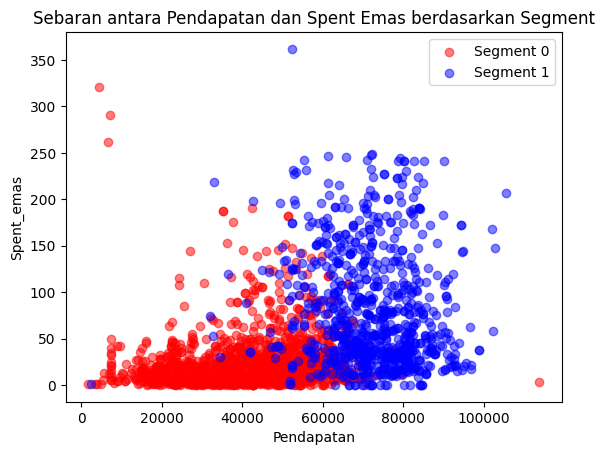

In [78]:
# Pisahkan data menjadi dua subset berdasarkan segment
cluster_0_data = data_segment[data_segment['segment'] == 0]
cluster_1_data = data_segment[data_segment['segment'] == 1]

# Plot scatter plot untuk klaster 0
plt.scatter(cluster_0_data['Pendapatan'], cluster_0_data['Spent_emas'], color='red', alpha=0.5, label='Segment 0')

# Plot scatter plot untuk klaster 1
plt.scatter(cluster_1_data['Pendapatan'], cluster_1_data['Spent_emas'], color='blue', alpha=0.5, label='Segment 1')

# Menambahkan label dan judul
plt.xlabel('Pendapatan')
plt.ylabel('Spent_emas')
plt.title('Sebaran antara Pendapatan dan Spent Emas berdasarkan Segment')
plt.legend()

# Tampilkan plot
plt.show()

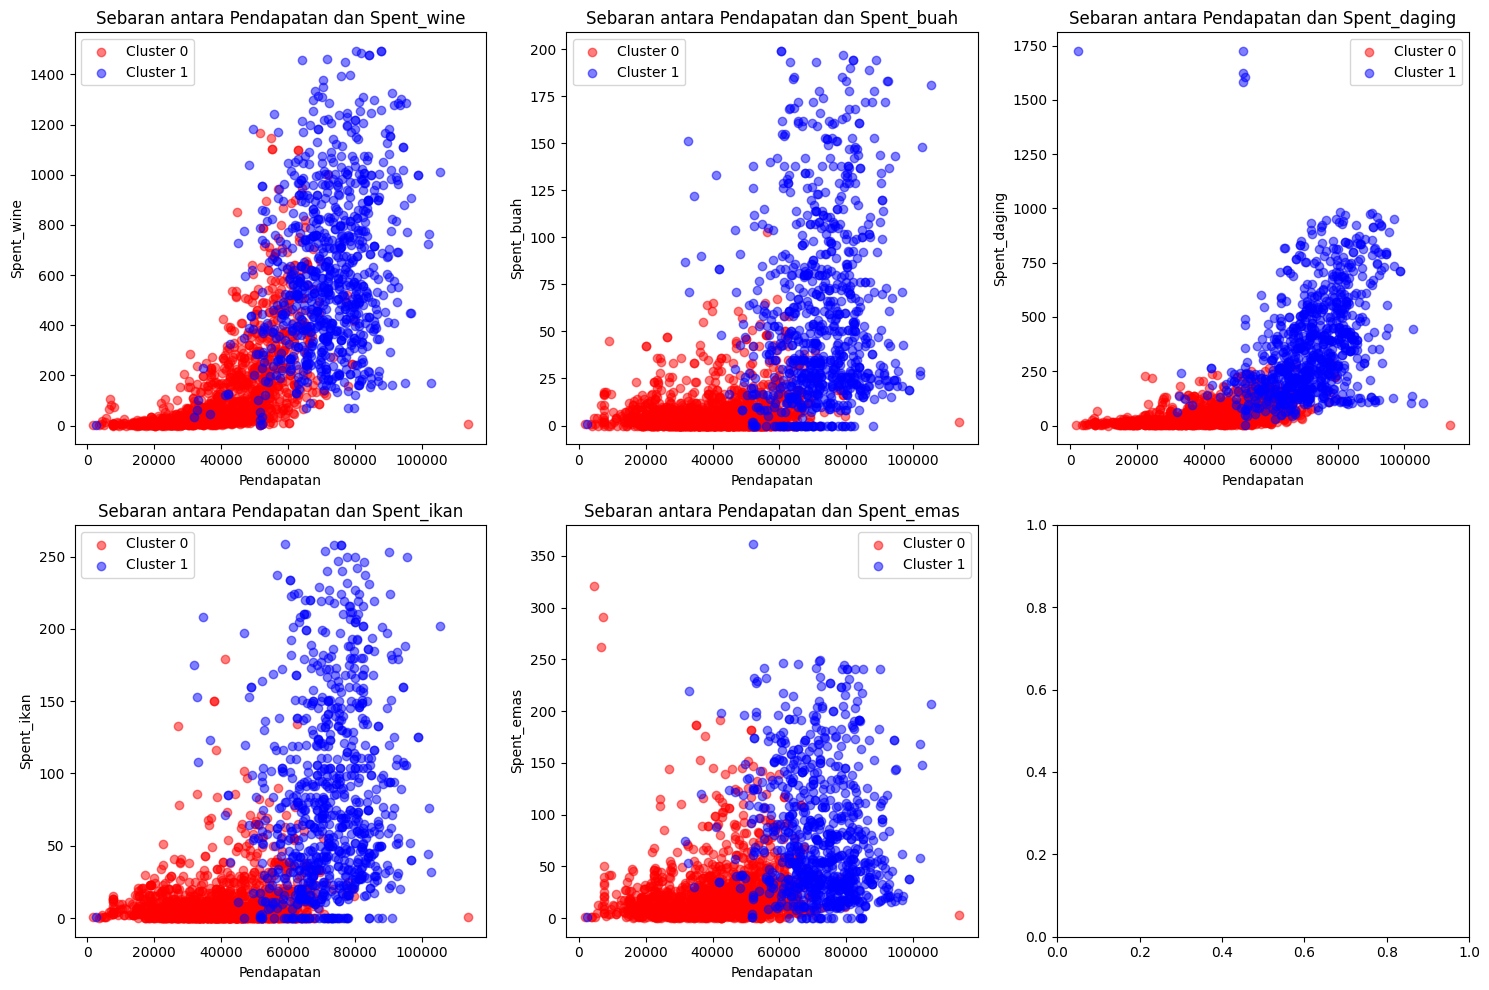

In [79]:
import matplotlib.pyplot as plt

# Pisahkan data menjadi dua subset berdasarkan segment
cluster_0_data = data_segment[data_segment['segment'] == 0]
cluster_1_data = data_segment[data_segment['segment'] == 1]

# Tentukan variabel pengeluaran
pengeluaran = ['Spent_wine', 'Spent_buah', 'Spent_daging', 'Spent_ikan', 'Spent_emas']

# Membuat subplot dengan ukuran 2 baris dan 3 kolom
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot scatter plot untuk klaster 0 dan klaster 1 pada setiap variabel pengeluaran
for i, ax in enumerate(axs.flat):
    if i < len(pengeluaran):
        ax.scatter(cluster_0_data['Pendapatan'], cluster_0_data[pengeluaran[i]], color='red', alpha=0.5, label='Cluster 0')
        ax.scatter(cluster_1_data['Pendapatan'], cluster_1_data[pengeluaran[i]], color='blue', alpha=0.5, label='Cluster 1')
        ax.set_xlabel('Pendapatan')
        ax.set_ylabel(pengeluaran[i])
        ax.set_title('Sebaran antara Pendapatan dan {}'.format(pengeluaran[i]))
        ax.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


dari scatterplot itu dapat dilihat bahwa semakin besar pendapatannya, semakin besar juga dia melakukan spent terhadap produk itu

# ***KESIMPULAN/SARAN***

####***KESIMPULAN : (Customer Profiling)***:

- **Cluster 0:**
1. Diperkirakan terdiri dari customer dengan usia rata-rata 54,4 tahun (lebih muda dari cluster 1)
2. Memiliki pendapatan rata-rata sebesar 39841.35 (lebih rendah dari cluster 1)
3. Mayoritas memiliki 1 atau 2 anak
4. Cenderung memiliki jumlah remaja yang lebih tinggi di segala kategori.
5. Mereka cenderung menghabiskan lebih sedikit uang dalam belanja wine, buah, daging, ikan, dan emas.

- **Cluster 1:**
1. Diperkirakan terdiri dari customer dengan usia rata-rata 56,5 tahun (lebih tua dari cluster 0)
2.  Memiliki pendapatan rata-rata sebesar 72152.21 (lebih tinggi dari cluster 0)
3. Mayoritas tidak memiliki anak
4. Mayoritas tidak memiliki remaja
5. Mereka cenderung menghabiskan lebih banyak uang dalam belanja wine, buah, daging, ikan, dan emas.






###***SARAN : (Strategi Bisnis Agar Penjualan Produk bisa lebih Maksimal)***

- **Cluster 0**
1. Penawaran dan promosi produk dengan harga lebih terjangkau seperti diskon, bundle, dll
2. Edukasi produk dengan sasaran manfaat produk bagi keluarga
3. Penawaran produk lain yang berkaitan dengan remaja seperti produk kecantikan, fashion, atau hiburan

- **Cluster 1**
1. Promosi produk atau layanan premium yang memberi nilai tambah seperti layanan eksklusif yang lebih personal, atau produk yang lebih berkualitas.
2. penawaran produk khusus customer tanpa melibatkan kebutuhan keluarga seperti Wine, barang mewah, atau yang lainnya



